# Assignment 6

### 1.复习上课内容以及复现课程代码

在本部分，你需要复习上课内容和课程代码后，自己复现课程代码。

In [2]:
import tensorflow as tf

In [140]:
tf.executing_eagerly()

True

In [141]:
a = [[1.]]

In [142]:
tf.matmul(a, a)

<tf.Tensor: id=14682, shape=(1, 1), dtype=float32, numpy=array([[1.]], dtype=float32)>

In [143]:
a = tf.constant([[1,2,],[3,4]])

In [144]:
b = tf.add(a,1)
b

<tf.Tensor: id=14685, shape=(2, 2), dtype=int32, numpy=
array([[2, 3],
       [4, 5]])>

In [145]:
tf.matmul(a,b)

<tf.Tensor: id=14686, shape=(2, 2), dtype=int32, numpy=
array([[10, 13],
       [22, 29]])>

In [146]:
import numpy as np

In [147]:
np.dot(a,b)

array([[10, 13],
       [22, 29]])

In [148]:
w = tf.Variable([[2.]])
with tf.GradientTape() as tape:
    loss = w * w
grad = tape.gradient(loss, w)
print(grad)

tf.Tensor([[4.]], shape=(1, 1), dtype=float32)


In [149]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train[:10000]
y_train = y_train[:10000]
x_test = x_test[:1000]
y_test = y_test[:1000]

In [150]:
x_train = tf.cast(x_train[..., tf.newaxis] / 255, tf.float32)
x_test = tf.cast(x_test[..., tf.newaxis] / 255, tf.float32)
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [151]:
model1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, [3,3], activation='relu', input_shape=(28,28,1)),
    tf.keras.layers.Conv2D(64, [3,3], activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [152]:
model1.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_58 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_59 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_43 (Dropout)         (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_25 (Flatten)         (None, 9216)              0         
_________________________________________________________________
dense_41 (Dense)             (None, 128)               1179776   
_________________________________________________________________
dropout_44 (Dropout)         (None, 128)              

In [153]:
inputs = tf.keras.Input(shape=(None, None, 1), )
conv_1 = tf.keras.layers.Conv2D(32, [3,3], activation='relu')(inputs)
conv_2 = tf.keras.layers.Conv2D(64, [3,3], activation='relu')(conv_1)
max_pool = tf.keras.layers.GlobalAveragePooling2D()(conv_2)
dropout1 = tf.keras.layers.Dropout(0.25)(max_pool)
flatten = tf.keras.layers.Flatten()(dropout1)
dense_1 = tf.keras.layers.Dense(128, activation='relu')(flatten)
dropout_2 = tf.keras.layers.Dropout(0.5)(dense_1)
outputs = tf.keras.layers.Dense(10, activation='softmax')(dropout_2)
model2 = tf.keras.Model(inputs=inputs, outputs=outputs)

In [154]:
model2.summary()

Model: "model_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_23 (InputLayer)        [(None, None, None, 1)]   0         
_________________________________________________________________
conv2d_60 (Conv2D)           (None, None, None, 32)    320       
_________________________________________________________________
conv2d_61 (Conv2D)           (None, None, None, 64)    18496     
_________________________________________________________________
global_average_pooling2d_8 ( (None, 64)                0         
_________________________________________________________________
dropout_45 (Dropout)         (None, 64)                0         
_________________________________________________________________
flatten_26 (Flatten)         (None, 64)                0         
_________________________________________________________________
dense_43 (Dense)             (None, 128)               832

In [155]:
model1.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=1e3),
    validation_split=0.1,
    shuffle=True,
    loss=tf.keras.losses.categorical_crossentropy,
    metric=['accuracy']
)

In [156]:
model2.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=1e3),
    loss=tf.keras.losses.categorical_crossentropy,
    metric=['accuracy']
)

In [157]:
model1.fit(x_train, y_train, batch_size=128, epochs=3)

Train on 10000 samples
Epoch 1/3
10000/10000 [==============================] - 14s 1ms/sample - loss: 53026114413251776217088.0000
Epoch 2/3
10000/10000 [==============================] - 14s 1ms/sample - loss: 450.1538
Epoch 3/3
10000/10000 [==============================] - 14s 1ms/sample - loss: 448.2103


In [158]:
model2.fit(x_train, y_train, batch_size=128, epochs=1)

Train on 10000 samples
10000/10000 [==============================] - 12s 1ms/sample - loss: 20210240417.8312


In [159]:
inputs = tf.keras.Input(shape=(None, None, 1), )
conv_1 = tf.keras.layers.Conv2D(32, [3,3], activation='relu')(inputs)
conv_2 = tf.keras.layers.Conv2D(64, [3,3], activation='relu')(conv_1)
max_pool = tf.keras.layers.GlobalAveragePooling2D()(conv_2)
# max_pool = tf.keras.layers.GlobalMaxPooling2D()(conv_2)
dropout1 = tf.keras.layers.Dropout(0.25)(max_pool)
flatten = tf.keras.layers.Flatten()(dropout1)
dense_1 = tf.keras.layers.Dense(128, activation='relu')(flatten)
dropout_2 = tf.keras.layers.Dropout(0.5)(dense_1)
outputs = tf.keras.layers.Dense(10, activation='softmax')(dropout_2)
model2 = tf.keras.Model(inputs=inputs, outputs=outputs)

# 老师, 上面一格注掉的那个地方我用了GlobalMaxPooling2D, loss就变成了nan了, 好像太大超过了范围, 这是为什么啊

In [160]:
model2.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=1e3),
    loss=tf.keras.losses.categorical_crossentropy,
    metric=['accuracy']
)

In [161]:
model2.fit(x_train, y_train, batch_size=128, epochs=2)

Train on 10000 samples
Epoch 1/2
10000/10000 [==============================] - 13s 1ms/sample - loss: 126914589211008.8750
Epoch 2/2
10000/10000 [==============================] - 11s 1ms/sample - loss: 452.5416


In [162]:
model1.evaluate(x_test, y_test, batch_size=128, )

1000/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

591.8895478515625

In [163]:
model2.evaluate(x_test, y_test, batch_size=128, )

1000/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

566.7381552734375

In [164]:
model1.predict(x_test[-10:])

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [165]:
model2.predict(x_test[-10:])

array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [166]:
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.mnist.load_data()
print(x_train.shape, y_train.shape)
x_train = x_train[:10000,:,:]
y_train = y_train[:10000]
x_test = x_test[:1000,:,:]
y_test = y_test[:1000]

(60000, 28, 28) (60000,)


In [167]:
x_test = tf.cast(x_test[..., tf.newaxis], tf.float32)
x_train = tf.cast(x_train[..., tf.newaxis], tf.float32)

In [168]:
y_train = tf.cast(y_train, tf.int64)

In [169]:
y_test = tf.cast(y_test, tf.int64)

In [170]:
mnist_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,[3,3],activation='relu',
                          input_shape=(28,28,1)),
    tf.keras.layers.Conv2D(64,[3,3],activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation="relu"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10,activation="softmax")
])

In [172]:
dataset = tf.data.Dataset.from_tensor_slices(
    (x_train, y_train)
)
dataset = dataset.shuffle(1000).batch(32)


In [175]:
optimizer = tf.keras.optimizers.SGD(learning_rate=1e3, )
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

# 老师, 这个from_logits是干什么的啊, 我查了还是没看明白

In [176]:
for epoch in range(5):
    for (batch , (images, labels)) in enumerate(dataset):
        with tf.GradientTape() as tape:
            logits = mnist_model(images, training=True)
            loss_value = loss(labels, logits)
        grads = tape.gradient(loss_value, mnist_model.trainable_variables)
        optimizer.apply_gradients(zip(grads, mnist_model.trainable_variables))
        
    print(epoch)

0
1
2
3
4


In [177]:
mnist_model.predict(x_test[:1])

array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

### 2.回答以下理论题目?

#### 1. Compared to FNN, what is the biggest advantage of CNN?

CNN在前馈神经网络之前加上了卷积和池化, 可以通过识别图片的边, 在识别轮廓, 再识别出图案, 然后再拉长后进行前馈神经网络的训练

#### 2. Suppose your input is a 100 by 100 gray image, and you use a convolutional layer with 50 filters that are each 5x5. How many parameters does this hidden layer have (including the bias parameters)? 

(5*5 +1)*50  = 1300

# 老师, 我对这个参数数量还不是很理解, 如果两层卷积层, 是两层卷积层的参数相加吗, 应该不是相乘吧, maxpooling和avgpooling的池化层的参数是没有的吧

#### 3. What are "local invariant" and "parameter sharing" ?

平移不变性, 这是一个图像出现在图片的其他位置, 也能识别出来, 参数共享是卷积核的参数在平移的时候是不变的, 可以减少参数的数量, 降低过拟合风险

#### 4. Why we use batch normalization ?

如果不使用batch normalization, 在z值输入到激活函数时, 因为z值可能偏离0很远, 导致relu的梯度都是0或1, sigmoid的梯度都是0, 另外在上一层神经元的参数变化并输出后, 和变化前的参数的分布不一样, 下一层的神经元需要参数修改, 降低了训练速度

#### 5. What problem does dropout try to solve ?

随机让一部分神经元不使用, 对单个神经元的w的影响降低, 减少过拟合的风险

#### 6.  Is the following statement correct and why ? "Because pooling layers do not have parameters, they do not affect  the backpropagation(derivatives) calculation"

不正确, 如果是2*2的池化层, maxpooling其中最大的一个的偏导数是1, 其他是0, avgpooling的偏导数每个都是1/4

### 3. 实践题

#### 3.1 In the first session of the practical part, you will implement an image classification model using any deep learning libraries that you are familiar with,  which means, except for tensorflow and keras, you can also use pytorch/caffe/... .  The dataset used in this session is the cifar10 which contains 50000 color (RGB) images, each with size 32x32x3.  All 50000 images are classified into ten categories. 

In [35]:
import tensorflow as tf
import matplotlib.pyplot as plt

Load the dataset. 

In [104]:
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.cifar10.load_data()

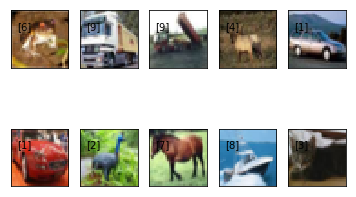

In [105]:
for i in range(1,11):
    plt.subplot(2,5,i)
    plt.imshow(x_train[i-1])
    plt.text(3,10,str(y_train[i-1]))
    plt.xticks([])
    plt.yticks([])
plt.show()

##### It is your time to build your model. Try your best to build a model with good performance on the test set.

In [106]:
x_train,x_test = tf.cast(x_train/255, tf.float32), tf.cast(x_test/255, tf.float32)

In [107]:
x_train.shape

TensorShape([50000, 32, 32, 3])

In [108]:
y_train[:2]

array([[6],
       [9]], dtype=uint8)

In [109]:
category = len(set(y_train.flatten()))
category

10

In [110]:
y_train, y_test = tf.keras.utils.to_categorical(y_train, category), tf.keras.utils.to_categorical(y_test, category)

In [111]:
y_train[:2]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [49]:
import tensorflow as tf

In [50]:
model = tf.keras.models.Sequential()

In [52]:
model.add(tf.keras.layers.Conv2D(64, [3,3], padding='same', activation='relu', input_shape=(x_train.shape[1:])))
model.add(tf.keras.layers.Conv2D(64, [3,3], padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.Conv2D(128, [3,3], padding='same', activation='relu'))
model.add(tf.keras.layers.Conv2D(128, [3,3], padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.Conv2D(256, [3,3], padding='same', activation='relu'))
model.add(tf.keras.layers.Conv2D(256, [3,3], padding='same', activation='relu'))
model.add(tf.keras.layers.Conv2D(256, [3,3], padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.Conv2D(512, [3,3], padding='same', activation='relu'))
model.add(tf.keras.layers.Conv2D(512, [3,3], padding='same', activation='relu'))
model.add(tf.keras.layers.Conv2D(512, [3,3], padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.Conv2D(512, [3,3], padding='same', activation='relu'))
model.add(tf.keras.layers.Conv2D(512, [3,3], padding='same', activation='relu'))
model.add(tf.keras.layers.Conv2D(512, [3,3], padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(4096, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(4096, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(1000, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))


In [55]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 256)        

In [56]:
model.compile(optimizer=tf.keras.optimizers.SGD(5e-3), loss=tf.keras.losses.categorical_crossentropy, metrics=['accuracy'])

#  老师, 我上面的这个compile的validation_split,shuffle两个参数还不是很明白, 能不能评语上面说一下啊, 谢谢老师

In [ ]:
model.fit(x_train, y_train, batch_size=32, epochs=5)

Train on 50000 samples
Epoch 1/5
  416/50000 [..............................] - ETA: 59:03 - loss: 2.3079 - accuracy: 0.0913

In [129]:
import tensorflow as tf

In [130]:
model = tf.keras.models.Sequential()

In [131]:
model.add(tf.keras.layers.Conv2D(32, [3,3], padding='same', activation='relu', input_shape=(x_train.shape[1:])))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.Conv2D(64, [3,3], padding='same', activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.Conv2D(128, [3,3], padding='same', activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(1024, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))


# 老师, 这个batch norm 我理解的是计算出z值以后再把z值norm一下, 防止梯度消失, 这应该加载conv2d后面还是conv2d前面啊

In [132]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_42 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
batch_normalization_43 (Batc (None, 16, 16, 64)        256       
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 8, 8, 128)       

In [70]:
model.compile(optimizer=tf.keras.optimizers.SGD(5e-3), loss=tf.keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [71]:
model.fit(x_train, y_train, batch_size=32, epochs=1)

Train on 50000 samples
50000/50000 [==============================] - 189s 4ms/sample - loss: 2.1406 - accuracy: 0.3012


In [53]:
for _ in range(3):
    model.fit(x_train, y_train, batch_size=32, epochs=1)
    print(model.evaluate(x_test, y_test))

Train on 50000 samples
50000/50000 [==============================] - 177s 4ms/sample - loss: 1.5968 - accuracy: 0.4169
10000/1 [=======================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[1.4012817672729492, 0.5001]
Train on 50000 samples
50000/50000 [==============================] - 182s 4ms/sample - loss: 1.4556 - accuracy: 0.4725
10000/1 [==========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[1.566710013961792, 0.4387]
Train on 50000 samples
50000/50000 [==============================] - 179s 4ms/sample - loss: 1.3591 - accuracy: 0.5086
10000/1 [===========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[1.3005179302215577, 0.522]


In [72]:
model.predict(x_test[:1])

array([[0.00104436, 0.00085481, 0.02021682, 0.38589203, 0.0114276 ,
        0.5210134 , 0.01432155, 0.04228641, 0.00098342, 0.00195955]],
      dtype=float32)

In [3]:
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.cifar10.load_data()

In [4]:
x_train,x_test = tf.cast(x_train/255, tf.float32), tf.cast(x_test/255, tf.float32)

In [5]:
print(x_train.shape, y_train.shape)

(50000, 32, 32, 3) (50000, 1)


In [6]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32, [3,3], padding='same', activation='relu', input_shape=(x_train.shape[1:])))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.Conv2D(64, [3,3], padding='same', activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.Conv2D(128, [3,3], padding='same', activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(1024, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))


In [7]:
optimizer = tf.keras.optimizers.SGD(0.01)

In [8]:
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [9]:
dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
dataset = dataset.shuffle(1000).batch(32)

In [10]:
loss_history = []

In [12]:
for epoch in range(1):
    for (batch, (image, labels)) in enumerate(dataset):
        with tf.GradientTape() as tape:
            logits = model(image, training=True)
            loss_value = loss(labels, logits)
        grad = tape.gradient(loss_value, model.trainable_variables)
        optimizer.apply_gradients(zip(grad, model.trainable_variables))
        loss_history.append(loss_value)
        
    print(epoch)
        

0


In [13]:
model.evaluate(x_test, y_test)

RuntimeError: You must compile your model before training/testing. Use `model.compile(optimizer, loss)`.

In [14]:
model.predict(x_test[:1])

array([[0.01406244, 0.07179783, 0.0184429 , 0.15929645, 0.00750936,
        0.4703051 , 0.00216451, 0.00060233, 0.25212842, 0.00369076]],
      dtype=float32)

In [17]:
loss_history

[<tf.Tensor: id=982, shape=(), dtype=float32, numpy=2.3119993>,
 <tf.Tensor: id=1465, shape=(), dtype=float32, numpy=2.3146372>,
 <tf.Tensor: id=1906, shape=(), dtype=float32, numpy=2.3064284>,
 <tf.Tensor: id=2347, shape=(), dtype=float32, numpy=2.3032894>,
 <tf.Tensor: id=2788, shape=(), dtype=float32, numpy=2.339324>,
 <tf.Tensor: id=3229, shape=(), dtype=float32, numpy=2.3482883>,
 <tf.Tensor: id=3670, shape=(), dtype=float32, numpy=2.3451943>,
 <tf.Tensor: id=4111, shape=(), dtype=float32, numpy=2.3259134>,
 <tf.Tensor: id=4552, shape=(), dtype=float32, numpy=2.3072865>,
 <tf.Tensor: id=4993, shape=(), dtype=float32, numpy=2.273623>,
 <tf.Tensor: id=5434, shape=(), dtype=float32, numpy=2.3174205>,
 <tf.Tensor: id=5875, shape=(), dtype=float32, numpy=2.3108087>,
 <tf.Tensor: id=6316, shape=(), dtype=float32, numpy=2.2722783>,
 <tf.Tensor: id=6757, shape=(), dtype=float32, numpy=2.2967288>,
 <tf.Tensor: id=7198, shape=(), dtype=float32, numpy=2.3366506>,
 <tf.Tensor: id=7639, shape=

### 4. Optional 

##### Do you want to build a CNN from scratch ? 

In this optianl part, you will build a cnn network step by step.

In [24]:
import numpy as np
np.random.seed(1)

##### 4.1 Implement a convolution step

Hints: Numpy.sum function might be useful.

In [21]:
def conv_single_step(a_prev_slice,W,b):
    '''
    Apply one filter defined by parameters W on a single slice (a_slice_prev) of the output activation 
    of the previous layer.
    Arguments:
    a_prev_slice: slice of input data (shape=(f,f,n_C_prev))
    W: Weight parameters contained in a window. (shape = (f,f,n_C_prev))
    b: Bias parameters contained in a window. (shape=(1,1,1))
    
    Reutrns:
    
    Z: a scalar value, the result of convolving the sliding window (W, b) on a slice x of the input data 
    '''
    # Element-wise product
    s = None
    
    # Sum over s  
    Z = None
    
    # Add bias b to z.
    Z = None
    
    return Z

In [ ]:
np.random.seed(1)
a_slice_prev = np.random.randn(4, 4, 3)
W = np.random.randn(4, 4, 3)
b = np.random.randn(1, 1, 1)

Z = conv_single_step(a_slice_prev, W, b)
print("Z =", Z)

Use the code above to test your code. If your c
ode is correct, you should be able to get the output shown as below.

<table>
    <tr>
        <td>
            Z
        </td>
        <td>
            -6.99908945068
        </td>
    </tr>

</table>

##### 4.2 Padding

Hints: Numpy.pad function might be useful.

In [ ]:
def zero_pad(X, pad):
    """
    Pad with zeros all images of the dataset X. The padding is applied to the height and width of an image, 
    as illustrated in Figure 1.
    
    Argument:
    X: python numpy array of shape (m, n_H, n_W, n_C) representing a batch of m images
    pad: integer, amount of padding around each image on vertical and horizontal dimensions
    
    Returns:
    X_pad: padded image of shape (m, n_H + 2*pad, n_W + 2*pad, n_C)
    """

    X_pad = None
    
    return X_pad

In [ ]:
np.random.seed(1)
x = np.random.randn(4, 3, 3, 2)
x_pad = zero_pad(x, 2)
print ("x.shape =\n", x.shape)
print ("x_pad.shape =\n", x_pad.shape)
print ("x[1,1] =\n", x[1,1])
print ("x_pad[1,1] =\n", x_pad[1,1])

Use the code above to test your code. If your code is correct, you should be able to get the output shown as below.

```
x.shape =
 (4, 3, 3, 2)
x_pad.shape =
 (4, 7, 7, 2)
x[1,1] =
 [[ 0.90085595 -0.68372786]
 [-0.12289023 -0.93576943]
 [-0.26788808  0.53035547]]
x_pad[1,1] =
 [[ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]]
```

##### 4.3 Implement a forward propagation in CNN.

Hints: The formulas to calculate the output shapes are :

$$ n_H = \lfloor \frac{n_{H_{prev}} - f + 2 \times pad}{stride} \rfloor +1 $$
$$ n_W = \lfloor \frac{n_{W_{prev}} - f + 2 \times pad}{stride} \rfloor +1 $$
$$ n_C = \text{number of filters used in the convolution}$$

In [ ]:
def conv_forward(A_prev, W, b, hparameters):
    """
    Implements the forward propagation for a convolution function
    
    Arguments:
    A_prev: output activations of the previous layer, 
        numpy array of shape (m, n_H_prev, n_W_prev, n_C_prev)
    W: Weights, numpy array of shape (f, f, n_C_prev, n_C)
    b: Biases, numpy array of shape (1, 1, 1, n_C)
    hparameters: python dictionary containing "stride" and "pad"
        
    Returns:
    Z: conv output, numpy array of shape (m, n_H, n_W, n_C)
    cache: cache of values needed for the conv_backward() function
    """
    
    # Get dimensions from A_prev's shape  
    (m, n_H_prev, n_W_prev, n_C_prev) = None
    
    # Get dimensions from W's shape 
    (f, f, n_C_prev, n_C) = None
    
    # Get information from "hparameters" 
    stride = None
    pad = None
    
    # Compute the dimensions of the CONV output volume using the formula given above. 
    # Hint: use int() to apply the 'floor' operation. 
    n_H = None
    n_W = None
    
    # Initialize the output volume Z with zeros. 
    Z = None
    
    # Create A_prev_pad by padding A_prev
    A_prev_pad = None
    
    for i in range(None):               # loop over the batch of training examples
        a_prev_pad = None               # Select ith training example's padded activation
        for h in range(None):           # loop over vertical axis of the output volume
            # Find the vertical start and end of the current "slice" 
            vert_start = None
            vert_end = None
            
            for w in range(None):       # loop over horizontal axis of the output volume
                # Find the horizontal start and end of the current "slice"
                horiz_start = None
                horiz_end = None
                
                for c in range(None):   # loop over channels (= #filters) of the output volume
                                        
                    # Use the corners to define the (3D) slice of a_prev_pad (See Hint above the cell). 
                    a_slice_prev = None
                    
                    # Convolve the (3D) slice with the correct filter W and bias b, to get back one output neuron. 
                    weights = None
                    biases = None
                    Z[i, h, w, c] = None
                                        
    
    # Making sure your output shape is correct
    assert(Z.shape == (m, n_H, n_W, n_C))
    
    # Save information in "cache" for the backprop
    cache = (A_prev, W, b, hparameters)
    
    return Z, cache

In [ ]:
np.random.seed(1)
A_prev = np.random.randn(10,5,7,4)
W = np.random.randn(3,3,4,8)
b = np.random.randn(1,1,1,8)
hparameters = {"pad" : 1,
               "stride": 2}

Z, cache_conv = conv_forward(A_prev, W, b, hparameters)
print("Z's mean =\n", np.mean(Z))
print("Z[3,2,1] =\n", Z[3,2,1])
print("cache_conv[0][1][2][3] =\n", cache_conv[0][1][2][3])

Use the code above to test your code. If your code is correct, you should be able to get the output shown as below.

```
Z's mean =
 0.692360880758
Z[3,2,1] =
 [ -1.28912231   2.27650251   6.61941931   0.95527176   8.25132576
   2.31329639  13.00689405   2.34576051]
cache_conv[0][1][2][3] = [-1.1191154   1.9560789  -0.3264995  -1.34267579]
```

##### 4.4 Pooling layers

Hints: As there\'s no padding, the formulas binding the output shape of the pooling to the input shape is:

$$ n_H = \lfloor \frac{n_{H_{prev}} - f}{stride} \rfloor +1 $$

$$ n_W = \lfloor \frac{n_{W_{prev}} - f}{stride} \rfloor +1 $$

$$ n_C = n_{C_{prev}}$$

In [ ]:
def pool_forward(A_prev, hparameters, mode = "max"):
    """
    Implements the forward pass of the pooling layer
    
    Arguments:
    A_prev: Input data, numpy array of shape (m, n_H_prev, n_W_prev, n_C_prev)
    hparameters: python dictionary containing "f" and "stride"
    mode: the pooling mode you would like to use, defined as a string ("max" or "average")
    
    Returns:
    A: output of the pool layer, a numpy array of shape (m, n_H, n_W, n_C)
    cache: cache used in the backward pass of the pooling layer, contains the input and hparameters 
    """
    
    # Get dimensions from the input shape
    (m, n_H_prev, n_W_prev, n_C_prev) = A_prev.shape
    
    # Get hyperparameters from "hparameters"
    f = hparameters["f"]
    stride = hparameters["stride"]
    
    # Define the dimensions of the output
    n_H = int(1 + (n_H_prev - f) / stride)
    n_W = int(1 + (n_W_prev - f) / stride)
    n_C = n_C_prev
    
    # Initialize output matrix A
    A = np.zeros((m, n_H, n_W, n_C))              
    
    for i in range(None):                         # loop over the training examples
        for h in range(None):                     # loop on the vertical axis of the output volume
            # Find the vertical start and end of the current "slice" (≈2 lines)
            vert_start = None
            vert_end = None
            
            for w in range(None):                 # loop on the horizontal axis of the output volume
                # Find the vertical start and end of the current "slice" (≈2 lines)
                horiz_start = None
                horiz_end = None
                
                for c in range (None):            # loop over the channels of the output volume
                    
                    # Use the corners to define the current slice on the ith training example of A_prev, channel c. (≈1 line)
                    a_prev_slice = None
                    
                    # Compute the pooling operation on the slice. 
                    # Use an if statement to differentiate the modes. 
                    # Use np.max and np.mean.
                    if mode == "max":
                        A[i, h, w, c] = None
                    elif mode == "average":
                        A[i, h, w, c] = None
    
    # Store the input and hparameters in "cache" for pool_backward()
    cache = (A_prev, hparameters)
    
    # Making sure your output shape is correct
    assert(A.shape == (m, n_H, n_W, n_C))
    
    return A, cache

In [ ]:
np.random.seed(1)
A_prev = np.random.randn(2, 5, 5, 3)
hparameters = {"stride" : 1, "f": 3}

A, cache = pool_forward(A_prev, hparameters)
print("mode = max")
print("A.shape = " + str(A.shape))
print("A =\n", A)
print()
A, cache = pool_forward(A_prev, hparameters, mode = "average")
print("mode = average")
print("A.shape = " + str(A.shape))
print("A =\n", A)

Use the code above to test your code. If your code is correct, you should be able to get the output shown as below.

```
mode = max
A.shape = (2, 3, 3, 3)
A =
 [[[[ 1.74481176  0.90159072  1.65980218]
   [ 1.74481176  1.46210794  1.65980218]
   [ 1.74481176  1.6924546   1.65980218]]

  [[ 1.14472371  0.90159072  2.10025514]
   [ 1.14472371  0.90159072  1.65980218]
   [ 1.14472371  1.6924546   1.65980218]]

  [[ 1.13162939  1.51981682  2.18557541]
   [ 1.13162939  1.51981682  2.18557541]
   [ 1.13162939  1.6924546   2.18557541]]]


 [[[ 1.19891788  0.84616065  0.82797464]
   [ 0.69803203  0.84616065  1.2245077 ]
   [ 0.69803203  1.12141771  1.2245077 ]]

  [[ 1.96710175  0.84616065  1.27375593]
   [ 1.96710175  0.84616065  1.23616403]
   [ 1.62765075  1.12141771  1.2245077 ]]

  [[ 1.96710175  0.86888616  1.27375593]
   [ 1.96710175  0.86888616  1.23616403]
   [ 1.62765075  1.12141771  0.79280687]]]]

mode = average
A.shape = (2, 3, 3, 3)
A =
 [[[[ -3.01046719e-02  -3.24021315e-03  -3.36298859e-01]
   [  1.43310483e-01   1.93146751e-01  -4.44905196e-01]
   [  1.28934436e-01   2.22428468e-01   1.25067597e-01]]

  [[ -3.81801899e-01   1.59993515e-02   1.70562706e-01]
   [  4.73707165e-02   2.59244658e-02   9.20338402e-02]
   [  3.97048605e-02   1.57189094e-01   3.45302489e-01]]

  [[ -3.82680519e-01   2.32579951e-01   6.25997903e-01]
   [ -2.47157416e-01  -3.48524998e-04   3.50539717e-01]
   [ -9.52551510e-02   2.68511000e-01   4.66056368e-01]]]


 [[[ -1.73134159e-01   3.23771981e-01  -3.43175716e-01]
   [  3.80634669e-02   7.26706274e-02  -2.30268958e-01]
   [  2.03009393e-02   1.41414785e-01  -1.23158476e-02]]

  [[  4.44976963e-01  -2.61694592e-03  -3.10403073e-01]
   [  5.08114737e-01  -2.34937338e-01  -2.39611830e-01]
   [  1.18726772e-01   1.72552294e-01  -2.21121966e-01]]

  [[  4.29449255e-01   8.44699612e-02  -2.72909051e-01]
   [  6.76351685e-01  -1.20138225e-01  -2.44076712e-01]
   [  1.50774518e-01   2.89111751e-01   1.23238536e-03]]]]
```

####  Congratulations! You hanve finished the assignment 6.  You now understand how convolutional neural networks work.